In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("concrete_data.csv")

In [2]:
df.head(3)

,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [3]:
X = df.drop(['concrete_strength'],axis=1).values

y = df['concrete_strength'].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

learningrate = 0.1

m = len(y)

ones = np.ones((m,1)) 
X = np.hstack((ones, X)) 
y = y[:,np.newaxis] 

theta = np.zeros(( X.shape[1],1))

theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [4]:
# Momentum Gradient Descent

m = len(X)
epochs = 1000
gamma = 0.1 # momentun
eta = 0.1 # Learning rate

v_b,v_w = 0,0

iteration_mom = []
loss_history_mom = []

for epoch in range(1000):
    iteration_mom.append(epoch)
    
    # Prediction
    y_pred = np.dot(X,theta)

    # Error
    error = y_pred-y
    
    # Compute loss function
    cost = np.sum((error)**2,axis=0)[0]
    
    loss_history_mom.append(cost)
    
     # Derivatie of Loss function
    dtheta = 1/m*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    
    # b = theta[:1]
    # db = dtheta[:1]
    # v_b = gamma * v_b + eta * db

    # w = theta[1:]
    # dw = dtheta[1:]
    # v_w = gamma * v_w + eta * dw

    # w = w - v_w
    # b = b - v_b
    
    # Update Weights
    v_b = gamma * v_b + eta * dtheta[:1]
    v_w = gamma * v_w + eta * dtheta[1:]

    theta[:1] = theta[:1] - v_b
    theta[1:] = theta[1:] - v_w

theta

array([[35.81796117],
       [12.32882178],
       [ 8.77535627],
       [ 5.4660982 ],
       [-3.36138761],
       [ 1.72334974],
       [ 1.26042305],
       [ 1.43789717],
       [ 7.20654147]])

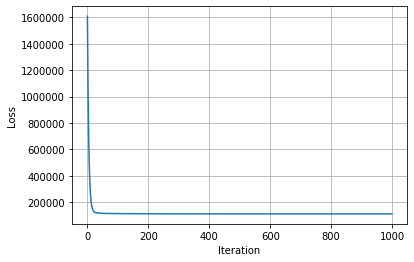

In [6]:
import matplotlib.pyplot as plt

plt.plot(iteration_mom,loss_history_mom)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()